## **ΥΠΟΛΟΓΙΣΤΙΚΗ ΕΡΓΑΣΙΑ IV: Χρονική εξέλιξη μιας κατάστασης σπιν $|s\rangle$ εντός σταθερού μαγνητικού πεδίου**

Θεωρήστε ένα κβαντικό σωματίδιο με αρχική κατάσταση σπιν $|s \rangle =\frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1\end{bmatrix}$ τη χρονική στιγμή $t=0$. Στο σωματίδιο εφαρμόζεται εξωτερικό σταθερό μαγνητικό πεδίο, παράλληλο προς τον άξονα z: $\vec{B}//\vec{e_z}$. Χρησιμοποιώντας τις δυνατότητες γραμμικής άλγεβρας της `SymPy`, ολοκληρώστε τις ακόλουθες ερωτήσεις.

**Παρατηρήσεις/Υποδείξεις:**

1. Ο γενικός τύπος του τελεστή χρονικής εξέλιξης για μια κατάσταση σπιν, όταν ένα εξωτερικό μαγνητικό πεδίο $\vec{B}$ εφαρμόζεται είναι: $$\hat{U}(t) = e^{-iωt(\vec{σ}\cdot \vec{B})}=cos(ωt)I_{2x2}-i (\vec{σ}\cdot \vec{n})sin(ωt)$$ όπου $I_{2x2}$ είναι ο $2x2$ ταυτοτικός πίνακας, $\vec{n}=\frac{\vec{B}}{|\vec{B}|}$ και $\vec{σ}=σ_1 \vec{e_x} + σ_2 \vec{e_y} + σ_3 \vec{e_z}$ (με $σ_i$, $i=1,2,3$ τους πίνακες *Pauli*).

2. Η μέση τιμή $\langle \hat{A} \rangle_ψ$ ενός ερμιτιανού τελεστή $\hat{A}$, ως προς μια κβαντική κατάσταση $|ψ\rangle$ είναι ίση με: $$\langle\hat{A} \rangle_ψ = \langle ψ|\hat{A}|ψ\rangle$$

3. Το διάνυσμα-τελεστής σπιν συνδέεται με το διάνυσμα-τελεστή των πινάκων Pauli μέσω της σχέσης:
$$\vec{s}=\frac{\hbar}{2}\vec{σ}$$

**Προετοιμασία**

In [163]:
# Φορτώνουμε τη βιβλιοθήκη SymPy
import sympy as smp

In [165]:
# Ορισμός χρήσιμων συμβόλων
t,omega,hbar = smp.symbols("t ω hbar",positive=True)
i = smp.I

# Ορίστε τους πίνακς Pauli και εκτυπώστε τους
sigma_1 = smp.Matrix([[0, 1],
                  [1, 0]])  # σ_x
sigma_2 = smp.Matrix([[0, -i],
                  [i, 0]])  # σ_y
sigma_3 = smp.Matrix([[1, 0],
                  [0, -1]]) # σ_z

display(sigma_1)
display(sigma_2)
display(sigma_3)

# Ορίστε τον ταυτοτικό πίνακα 2x2 και εκτυπώστε τον
iden_2x2 = smp.Matrix( [[1, 0],
                   [0, 1]])

display(iden_2x2)

# Ορίστε την αρχική κατάσταση-spin σε μορφή πίνακα και εκτυπώστε την
spin_init = (1/smp.sqrt(2)) * smp.Matrix([[1],
                                      [1]])

display(spin_init)

Matrix([
[0, 1],
[1, 0]])

Matrix([
[0, -I],
[I,  0]])

Matrix([
[1,  0],
[0, -1]])

Matrix([
[1, 0],
[0, 1]])

Matrix([
[sqrt(2)/2],
[sqrt(2)/2]])

**Ερώτηση 1** 

Δείξτε ότι ο τελεστής της χρονικής εξέλιξης $\hat{U}(t)$ (της spin-κατάστασης του σωματιδίου) έχει την ακόλουθη μορφή μήτρας: 
$$\begin{bmatrix} e^{-iωt} & 0 \\ 0 & e^{iωt}\end{bmatrix} ή \begin{bmatrix} cos(ωt)-isin(ωt) & 0 \\ 0 & cos(ωt)+isin(ωt)\end{bmatrix}$$
Εξηγήστε στο παρακάτω **Markdown** κελί το σκεπτικό σας για να καταλήξετε στο συγκεκριμένο αποτέλεσμα.

**Εξήγηση**


Για $\vec{B}//\vec{e_z}$ προκύπτει ότι $\vec{n} = \vec{e_z}$ και άρα $\vec{\sigma} \cdot \vec{n} = \sigma_3 = \begin{bmatrix}1 & 0 \\ 0 & -1\end{bmatrix}$.

Άρα:

$$
\hat{U}(t) = e^{-i \omega t \sigma_3} = 
\begin{bmatrix}
e^{-i\omega t} & 0 \\
0 & e^{i\omega t}
\end{bmatrix}
$$

Εναλλακτικά, χρησιμοποιώντας τον τύπο του Euler:

$$
e^{\pm i\omega t} = \cos(\omega t) \pm i\sin(\omega t)
$$

προκύπτει ισοδύναμα:

$$
\hat{U}(t) = 
\begin{bmatrix}
\cos(\omega t) - i \sin(\omega t) & 0 \\
0 & \cos(\omega t) + i \sin(\omega t)
\end{bmatrix}
$$

Και οι δύο μορφές είναι ισοδύναμες και περιγράφουν τη χρονική εξέλιξη της κατάστασης spin σε σταθερό μαγνητικό πεδίο κατά τον άξονα $z$.



In [170]:
#Με simplify

#Τριγωνομετρική Μορφή
def U_trig(t, ω):
    U = smp.cos(ω*t)*iden_2x2 - i*smp.sin(ω*t)*sigma_3  
    return smp.simplify(U)

display(U_trig(t, omega))

#Εκθετική Μορφή
def U_exp(t, ω):
    U = smp.Matrix([
        [smp.exp(-i*ω*t), 0],
        [0, smp.exp(i*ω*t)]
    ])
    return smp.simplify(U)

display(U_exp(t, omega))

#Xωρίς simplify

#Τριγωνομετρική μορφή χωρίς simplify
def U_trig_unsimplify(t, ω):
    return smp.cos(ω*t)*iden_2x2 - i*smp.sin(ω*t)*sigma_3
    
display(U_trig_unsimplify(t, omega))

# 3. Εκθετική μορφή χωρίς simplify
def U_exp_unsimplify(t, ω):
    return smp.Matrix([
        [smp.exp(-i*ω*t), 0],
        [0, smp.exp(i*ω*t)]
    ])
display(U_exp_unsimplify(t, omega))

Matrix([
[exp(-I*t*ω),          0],
[          0, exp(I*t*ω)]])

Matrix([
[exp(-I*t*ω),          0],
[          0, exp(I*t*ω)]])

Matrix([
[-I*sin(t*ω) + cos(t*ω),                     0],
[                     0, I*sin(t*ω) + cos(t*ω)]])

Matrix([
[exp(-I*t*ω),          0],
[          0, exp(I*t*ω)]])

**Ερώτηση 2** 

**α)** Ορίστε μια συνάρτηση που επιστρέφει τη χρονική εξέλιξη της κατάστασης σπιν του σωματιδίου $|s(t)\rangle$ σε μορφή μήτρας και εμφανίστε τη συμβολική μορφή της $|s(t)\rangle$.

**Βοήθεια**

Για να λάβουμε την χρονική εξέλιξη $|s(t)\rangle$ της spin-κατάστασης ενός σωματιδίου, αρκεί να εφαρμόσουμε τον τελεστή $\hat{U}(t)$, πολλαπλασιάζοντας την αρχική spin-κατάσταση $|s\rangle$ από τα αριστερά. Δηλαδή:

$$|s(t)\rangle=\hat{U}(t)|s\rangle$$

In [173]:
# Ορισμός και εκτύπωση της χρονικής εξέλιξης της spin-κατάστασης του σωματιδίου

def spin_t(t, ω):
    # Μπορείς να αλλάξεις την U_trig_simpl με άλλη μορφή αν θέλεις
    return smp.simplify(U_exp(t, ω) * spin_init)

display(spin_t(t, omega))

Matrix([
[sqrt(2)*exp(-I*t*ω)/2],
[ sqrt(2)*exp(I*t*ω)/2]])

**β)** Βρείτε την μορφή της $|s(t)\rangle$ τη χρονική στιγμή $t=2s$, όταν $ω=\frac{π}{3}Hz$.

In [176]:
#Υπολογισμός της χρονικής εξέλιξης της κατάστασης για t = 2s και ω = π/3 Hz

#Ορίζουμε τις συγκεκριμένες τιμές για τις μεταβλητές 
t_value = 2
omega_value = smp.pi / 3

#Αντικαθιστούμε τις τιμές 
spin_at_value = spin_t(t_value, omega_value)

display(spin_at_value)

Matrix([
[-(-1)**(1/3)*sqrt(2)/2],
[ (-1)**(2/3)*sqrt(2)/2]])

**Ερώτηση 3** 

**α)** Βρείτε τη συμβολική μορφή των ακόλουθων μέσων τιμών: $\langle \hat{s}_x \rangle_t$, $\langle \hat{s}_y \rangle_t$ και $\langle \hat{s}_z \rangle_t$, ως προς την κατάσταση σπιν $|s(t)\rangle$. 

In [179]:
# Ορισμός και εκτύπωση των spin-πινάκων s_x,s_y και s_z
s_x = (hbar / 2) * sigma_1
s_y = (hbar / 2) * sigma_2
s_z = (hbar / 2) * sigma_3

# γράψτε παραπάνω τον σωστό τύπο των πινάκων s_x,s_y και s_z

display(s_x)
display(s_y)
display(s_z)

Matrix([
[     0, hbar/2],
[hbar/2,      0]])

Matrix([
[       0, -I*hbar/2],
[I*hbar/2,         0]])

Matrix([
[hbar/2,       0],
[     0, -hbar/2]])

In [181]:
# Εύρεση και εκτύπωση των ζητούμενων μέσων τιμών

#Ορίζουμε την ερμιτιανό συζηγή κατάσταση
spin_t_H = spin_t(t, omega).H 

# Υπολογισμός μέσων τιμών
mean_s_x = smp.simplify(spin_t_H * s_x * spin_t(t, omega)) # <s_x>(t)
mean_s_y = smp.simplify(spin_t_H * s_y * spin_t(t, omega)) # <s_y>(t)
mean_s_z = smp.simplify(spin_t_H * s_z * spin_t(t, omega)) # <s_z>(t)

display(mean_s_x)
display(mean_s_y)
display(mean_s_z)

Matrix([[hbar*cos(2*t*ω)/2]])

Matrix([[hbar*sin(2*t*ω)/2]])

Matrix([[0]])

**β)** Ορίστε τις μέσες τιμές $\langle \hat{s}_x \rangle_t$ και $\langle \hat{s}_y \rangle_t$ ως αριθμητικές συναρτήσεις των $t$ και $ω$, χρησιμοποιώντας την εντολή `lambdify()`. Θεωρείστε ότι $\hbar=1$, $ω=\frac{π}{4}Hz$ και δημιουργήστε ένα `NumPy` linspace 100 σημείων του $t$, στο διάστημα $[0,4]s$. Φτιάξτε μια γραφική παράσταση χρησιμοποιώντας τις τιμές της αριθμητικής συνάρτησης $\langle \hat{s}_x \rangle_t$ στα σημεία του linspace ως συντεταγμένες στον οριζόντιο άξονα και τις τιμές της αριθμητικής συνάρτησης $\langle \hat{s}_y \rangle_t$ στα σημεία του linspace ως συντεταγμένες στον κατακόρυφο άξονα. Σχολιάστε το αποτέλεσμα.

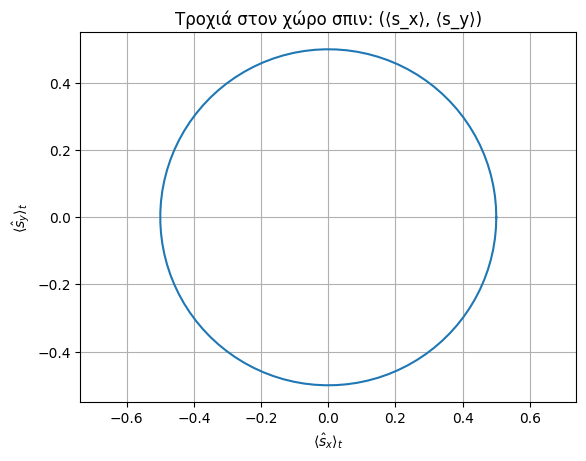

In [184]:
mean_s_x_num = smp.lambdify([t, omega], mean_s_x[0].subs(hbar, 1), "numpy")
mean_s_y_num = smp.lambdify([t, omega], mean_s_y[0].subs(hbar, 1), "numpy")

from numpy import linspace, pi
t_space = linspace(0, 4, 100) #linspace 100 σημείων στο διάστημα [0, 4]

# εισαγωγή της βιβλιοθήκης matplotlib για γραφικές παραστάσεις
import matplotlib.pyplot as plt 

omega_val = pi / 4

import matplotlib.pyplot as plt

plt.plot(mean_s_x_num(t_space,omega_val),mean_s_y_num(t_space,omega_val))
plt.axis("equal") # δοκιμάστε να μετατρέψετε σε σχόλιο τη συγκεκριμένη εντολή και ξανατρέξτε το κελί, τι παρατηρείτε;
plt.xlabel(r"$\langle \hat{s}_x \rangle_t$")
plt.ylabel(r"$\langle \hat{s}_y \rangle_t$")
plt.title("Τροχιά στον χώρο σπιν: (⟨s_x⟩, ⟨s_y⟩)")
plt.grid(True)
plt.show()

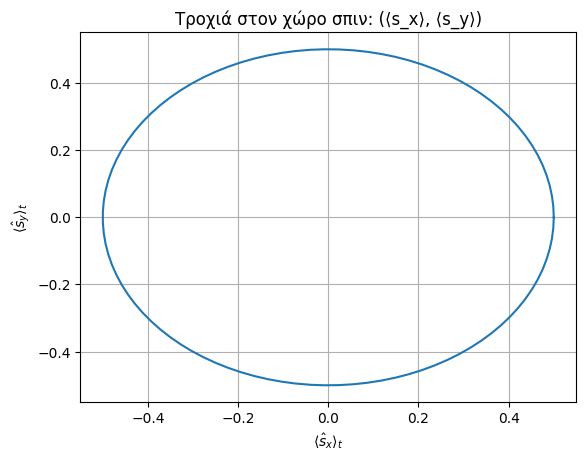

In [186]:
mean_s_x_num = smp.lambdify([t, omega], mean_s_x[0].subs(hbar, 1), "numpy")
mean_s_y_num = smp.lambdify([t, omega], mean_s_y[0].subs(hbar, 1), "numpy")

from numpy import linspace, pi
t_space = linspace(0, 4, 100) #linspace 100 σημείων στο διάστημα [0, 4]

#Εισαγωγή της βιβλιοθήκης matplotlib για γραφικές παραστάσεις
import matplotlib.pyplot as plt 

omega_val = pi / 4

import matplotlib.pyplot as plt

plt.plot(mean_s_x_num(t_space,omega_val),mean_s_y_num(t_space,omega_val))
#plt.axis("equal") # δοκιμάστε να μετατρέψετε σε σχόλιο τη συγκεκριμένη εντολή και ξανατρέξτε το κελί, τι παρατηρείτε;
plt.xlabel(r"$\langle \hat{s}_x \rangle_t$")
plt.ylabel(r"$\langle \hat{s}_y \rangle_t$")
plt.title("Τροχιά στον χώρο σπιν: (⟨s_x⟩, ⟨s_y⟩)")
plt.grid(True)
plt.show()

**Σχολιασμός αποτελέσματος**

Η παραγόμενη γραφική παράσταση δείχνει την τροχιά της μέσης τιμής του σπιν στον χώρο ($\langle \hat{s}_x \rangle_t$, $\langle \hat{s}_y \rangle_t$), δηλαδή το πώς εξελίσσεται η κατάσταση σπιν στο επίπεδο x-y, εξαιτίας της δράσης του σταθερού μαγνητικού πεδίου κατά τον άξονα z.

- Όταν χρησιμοποιούμε την εντολή plt.axis("equal"), οι μονάδες στους άξονες x και y έχουν ίδια γραφική κλίμακα, και η τροχιά εμφανίζεται κυκλική όπως αναμένεται από τη φυσική του προβλήματος.
- Όταν αφαιρούμε την εντολή αυτή, η matplotlib κλιμακώνει αυτόματα τους άξονες, προκαλώντας οπτική παραμόρφωση της τροχιάς σε έλλειψη. Η καμπύλη είναι ακόμα μαθηματικά κυκλική, όμως παραμορφώνεται στο γράφημα.

- Φυσική ερμηνεία: Η κυκλική τροχιά αντιστοιχεί στην προκαθορισμένη περιστροφή του διανύσματος σπιν γύρω από τον άξονα του μαγνητικού πεδίου. Η μέση τιμή του σπιν στο επίπεδο xy διαγράφει κύκλο, ενώ η z-συνιστώσα παραμένει σταθερή (στην περίπτωση αυτή: μηδέν).
